# All Models Created to Predict Uptake of Nanoparticles

### Import Libraries

In [77]:
import pandas as pd
import numpy as np
from random import seed
from random import randint
import matplotlib.pyplot as plt
from sklearn import linear_model
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers 
import kerastuner as kt
import seaborn 
import nbconvert

### Import Data

In [176]:
#data = open('Data for Model.csv')
df = pd.read_csv('DataforModel.csv', sep = ';')

### Data pre-processing and Splitting into training/validation/test sets

In [177]:
# split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df[['C6H', 'C6R', 'C6K', 'C32H', 'C32R', 'C32K', 'Cell Type ', 'Size', 'Polydispersity']]
y = df['Uptake']

# First, we split the data into the training and the remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state = 7)

# Next, we want the validation and test set to be each 10% of the overall data 
# We define valid_size=0.5 and test_size=0.5 so they are split equally
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 7)


print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
print(X_train)


(192, 9)
(192,)
(24, 9)
(24,)
     C6H  C6R  C6K  C32H  C32R  C32K  Cell Type    Size  Polydispersity
157   40    0    0    60     0     0           3  515.0         0.01490
66    80    0   20     0     0     0           2  503.0         0.10510
180   20   80    0     0     0     0           4  122.5         0.06860
209    0   40    0     0    60     0           4  223.0         0.02011
77     0    0    0     0    20    80           2  100.6         0.68300
..   ...  ...  ...   ...   ...   ...         ...    ...             ...
211    0   80    0     0    20     0           4  108.5         0.05490
67    60    0   40     0     0     0           2  603.0         0.11750
25    40    0    0     0    60     0           1  421.5         0.04580
196    0    0    0     0    60    40           4  173.5         0.66000
175    0   80    0     0     0    20           3  276.0         0.05915

[192 rows x 9 columns]


### Data Normalization

In [178]:
mean = X_train.mean(axis=0)
print(mean)
X_train -= mean
std = X_train.std(axis=0)
print(std)
X_train /= std
print(X_train)

X_valid -=mean
X_valid/=std

X_test -=mean
X_test/=std

C6H                15.416667
C6R                17.812500
C6K                16.041667
C32H               17.291667
C32R               16.875000
C32K               16.562500
Cell Type           2.526042
Size              283.105208
Polydispersity      0.132958
dtype: float64
C6H                27.833336
C6R                29.398975
C6K                27.399666
C32H               28.227912
C32R               28.035598
C32K               27.508328
Cell Type           1.143774
Size              192.292102
Polydispersity      0.167650
dtype: float64
          C6H       C6R       C6K      C32H      C32R      C32K  Cell Type   \
157  0.883233 -0.605888 -0.585469  1.512982 -0.601913 -0.602090    0.414381   
66   2.320359 -0.605888  0.144466 -0.612573 -0.601913 -0.602090   -0.459918   
180  0.164671  2.115295 -0.585469 -0.612573 -0.601913 -0.602090    1.288680   
209 -0.553892  0.754703 -0.585469 -0.612573  1.538223 -0.602090    1.288680   
77  -0.553892 -0.605888 -0.585469 -0.612573  0.111465

## Multi-linear Regression

### Training Model

In [163]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### Calculating error of model on test set

In [164]:
prediction_linear = np.zeros(len(y_test))
for i in range(len(y_test)):
    prediction_linear[i] = regr.predict([(X_test.values)[i]])
mae = mean_absolute_error(y_test, prediction_linear)
print(mae)


16.242775715242463


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature na

## Random Forest Model

### Grid search on random forest model to find optimal number of trees and depth of each tree

In [109]:
## Define Grid 
grid = { 
    'n_estimators': [50,75, 100, 130, 140, 160, 150, 200, 250, 300],
    'max_depth' : [5,10,13,14,15,16,17,18, 20,25],
}
## show start time
print(datetime.datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())
CV_rfr.best_params_

2022-06-11 18:35:19.958808
2022-06-11 18:36:46.209121


{'max_depth': 18, 'n_estimators': 150}

### Training model with optimal parameters

In [148]:
model_RF = RandomForestRegressor(n_estimators = 150, 
                           max_features = 'sqrt', max_depth = 18)
model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, max_features='sqrt', n_estimators=150)

### Calculating error of model

In [150]:
prediction_RF = model_RF.predict(X_test)
mae = mean_absolute_error(y_test, prediction_RF)
print(mae)


13.909930555555556


## Gradient Boosting Trees Model

### Grid search on Gradient Boosting Trees model to find optimal number of trees and depth of each tree

In [115]:
## Define Grid 
grid = { 
    'n_estimators': [50,75, 100, 130, 140, 160, 150, 200, 250, 300],
    'max_depth' : [5,10,13,14,15,16,17,18, 20,25],
}
## show start time
print(datetime.datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())
CV_rfr.best_params_

2022-06-11 18:37:50.514569
2022-06-11 18:38:27.910765


{'max_depth': 5, 'n_estimators': 50}

### Training model with optimal parameters

In [179]:
model_boost = GradientBoostingRegressor(n_estimators = 50, max_depth = 5, )
model_boost.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50)

### Calculating error of model

In [180]:
prediction_boost = model_boost.predict(X_test)
mae = mean_absolute_error(y_test, prediction_boost)
print(mae)

13.655114422736908


## Neural Network 

### Define function to create neural network with different parameters to be tuned

In [167]:
def model_builder(hp):
  '''
  Args:
    hp - Keras tuner object
  '''
  # Initialize the Sequential API and start stacking the layers
  model = keras.Sequential()
  model.add(keras.layers.Dense(40, activation='relu',
                           input_shape=(X_train.shape[1],)))
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 1-100
  hp_units = hp.Int('units', min_value=1, max_value=100, step=2)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  # Add next layers
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  #model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(1))
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2])
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                loss='mse',
                metrics=[keras.metrics.MeanAbsoluteError()])
  return model
#keras.optimizers.Adam(learning_rate=hp_learning_rate)
#metrics=[keras.metrics.MeanAbsoluteError()]

### Use Keras Tuner to find the optimal parameters resulting in the lowest error

In [168]:
tuner = kt.RandomSearch(model_builder, objective = kt.Objective("val_mean_absolute_error",direction="min"), max_trials=200,overwrite = True, directory='my_dir')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


tuner.results_summary()

Trial 34 Complete [00h 00m 01s]
val_mean_absolute_error: 11.06485366821289

Best val_mean_absolute_error So Far: 10.567726135253906
Total elapsed time: 00h 00m 58s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 91 and the optimal learning rate for the optimizer
is 0.01.

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 91
learning_rate: 0.01
Score: 10.567726135253906
Trial summary
Hyperparameters:
units: 95
learning_rate: 0.01
Score: 10.97535228729248
Trial summary
Hyperparameters:
units: 23
learning_rate: 0.01
Score: 11.06485366821289
Trial summary
Hyperparameters:
units: 25
learning_rate: 0.01
Score: 11.109333992004395
Trial summary
Hyperparameters:
units: 21
learning_rate: 0.01
Score: 11.651883125305176
Trial summary
Hyperparameters:
units: 79
learning_rate: 0.01
Score: 11.672085762023926
Trial summary
Hyperparameters:
unit

### Build neural network with optimal parameters found - 2 hidden layers, each with 41 nodes

In [169]:
#Model has two hidden layers each with 41 units 
def build_model():
    # Since we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(41, activation='relu',
                           input_shape=(X_train.shape[1],)))
    
    model.add(layers.Dense(41, activation='relu'))
    model.add(layers.Dense(1))
    #model.compile(optimizer='RMSprop', loss='mse', metrics=['mae'])
    #optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate)
    model.compile(optimizer='RMSprop', loss='mse', metrics=['mae'])
    return model

### Train the model over 100 epochs on the training set, and calculate error with validation set

In [173]:
num_epochs = 100
#all_scores = []
all_mae_histories = []

#Build the Keras model
model = build_model()
# Train the model (in silent mode, verbose=0) and evaluate on validation data 
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=num_epochs, batch_size=5, verbose=0)
# Evaluate the model on the validation data
#val_mse, val_mae = model.evaluate(X_valid, y_valid, verbose=0)
#all_scores.append(val_mae)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

### Observe validation set error

In [174]:
#Print the validation set error of model
print(history.history.keys())
val_mse, val_mae = model.evaluate(X_valid, y_valid, verbose=0)
print(val_mae)
print(min(mae_history))



dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
13.518712043762207
11.836209297180176


### Observe training and test set error

In [175]:
#Print the training set and test set error
train_mse, train_mae = model.evaluate(X_train, y_train, verbose=0)
print(train_mae)

test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(test_mae)

8.152148246765137
11.56441593170166


### Plot the validation error over number of epochs to observe learning of the model 

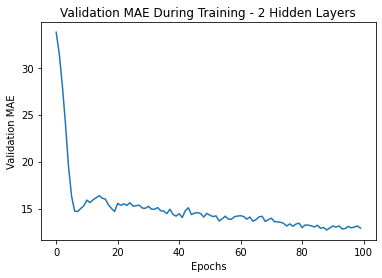

In [132]:
#Plot the validation set error as a function of the number of epochs of the model 
plt.plot(mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation MAE During Training - 2 Hidden Layers')
plt.show()

# SHAP Analysis on Gradient Boosting Trees Model

In [124]:
import shap

In [181]:
explainer = shap.TreeExplainer(model_boost)
shap_values = shap.TreeExplainer(model_boost).shap_values(X_train)

Text(0.5, 1.0, 'Global Feature Importance')

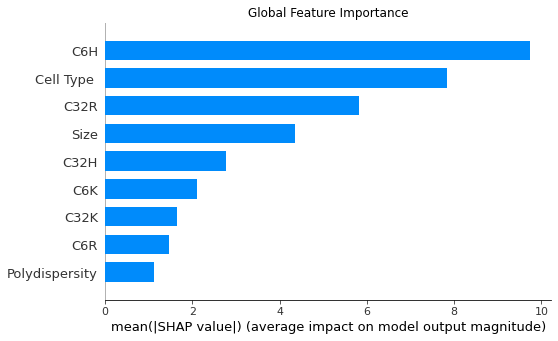

In [182]:
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.title('Global Feature Importance')

Text(0.5, 1.0, 'Local Explanation Summary')

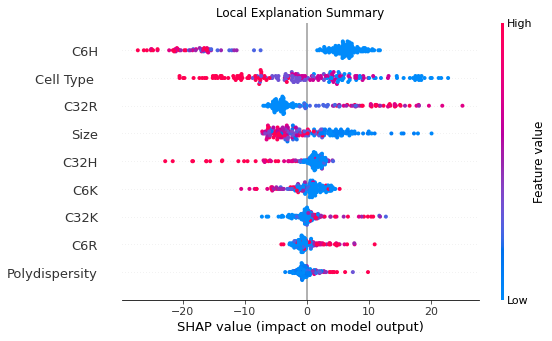

In [183]:
shap.summary_plot(shap_values, X_train, show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)
plt.title('Local Explanation Summary', fontsize = 12)


In [196]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[3],X_train.iloc[[3]])

In [12]:
shap.force_plot(explainer.expected_value,shap_values,X_train)

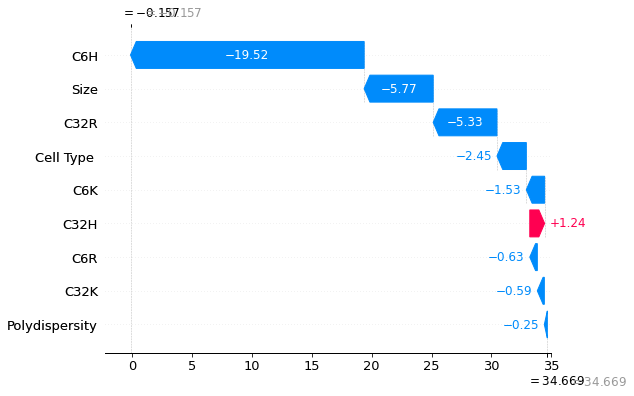

In [185]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[1],feature_names= X_test.columns)

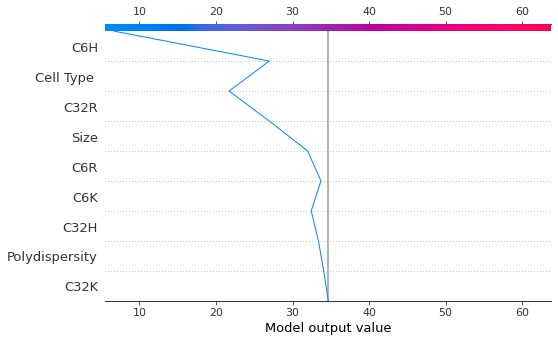

In [186]:
shap.decision_plot(explainer.expected_value[0], shap_values[0],feature_names= X_test.columns.tolist())

Text(0.5, 1.0, 'Partial Dependence Plot: Size and Cell Type')

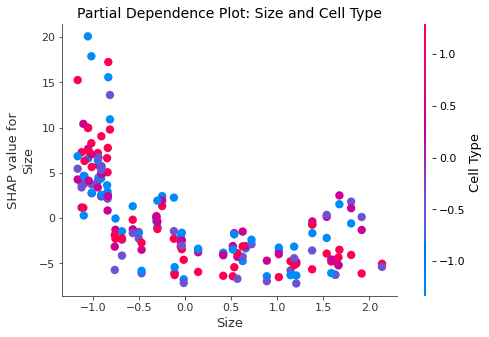

In [187]:
shap.dependence_plot("Size", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: Size and Cell Type', fontsize = 14)


Text(0.5, 1.0, 'Partial Dependence Plot: C32H and Cell Type')

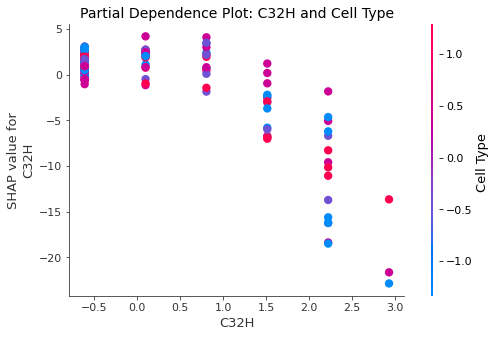

In [188]:
shap.dependence_plot("C32H", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: C32H and Cell Type', fontsize = 14)

Text(0.5, 1.0, 'Partial Dependence Plot: C32K and Cell Type')

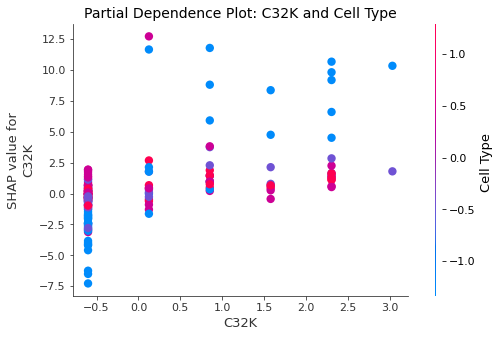

In [192]:
shap.dependence_plot("C32K", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: C32K and Cell Type', fontsize = 14)

Text(0.5, 1.0, 'Partial Dependence Plot: C32R and Cell Type')

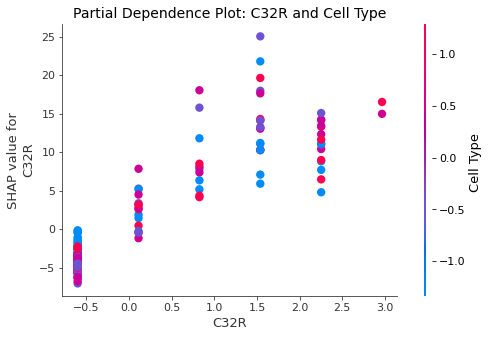

In [191]:
shap.dependence_plot("C32R", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: C32R and Cell Type', fontsize = 14)

Text(0.5, 1.0, 'Partial Dependence Plot: C6H and Cell Type')

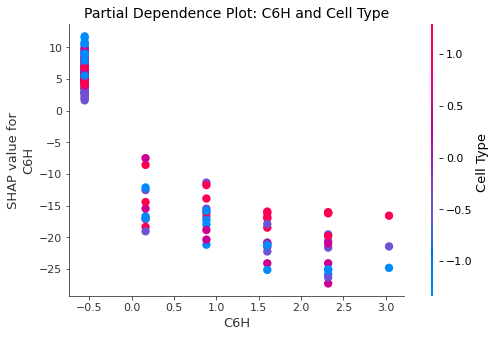

In [190]:
shap.dependence_plot("C6H", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: C6H and Cell Type', fontsize = 14)

Text(0.5, 1.0, 'Partial Dependence Plot: C6K and Cell Type')

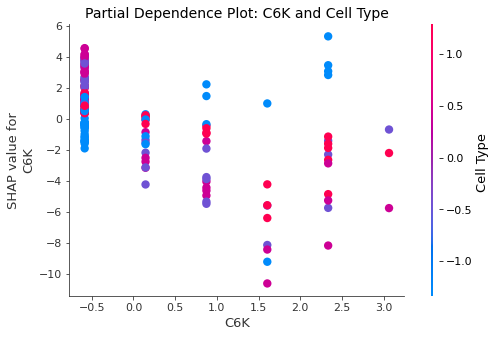

In [139]:
shap.dependence_plot("C6K", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: C6K and Cell Type', fontsize = 14)

Text(0.5, 1.0, 'Partial Dependence Plot: C6R and Cell Type')

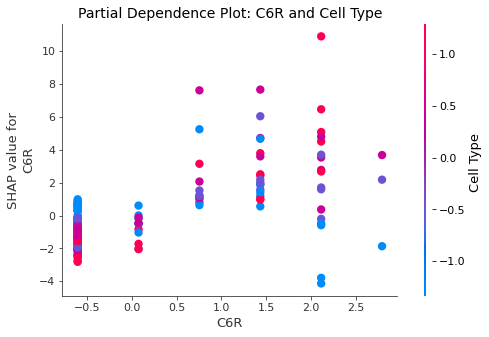

In [193]:
shap.dependence_plot("C6R", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: C6R and Cell Type', fontsize = 14)

Text(0.5, 1.0, 'Partial Dependence Plot: Polydispersity and Cell Type')

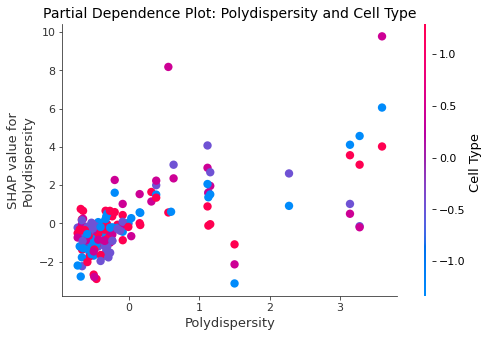

In [141]:
shap.dependence_plot("Polydispersity", shap_values,X_train, interaction_index = "Cell Type ", dot_size = 70, show=False)
plt.title('Partial Dependence Plot: Polydispersity and Cell Type', fontsize = 14)